In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loss Functions:
Hinge Loss Function:
$$
    L = max(0, 1 - y^{(i)} \times \hat{y}^{(i)} ) +  \lambda *||w||^2
$$
where
$$
    \hat{y}^{(i)}= 
\begin{cases}
     -1 ,& \text{if } w^Tx + b<= -1\\
      1 ,& \text{if } w^Tx + b >= 1
\end{cases}
$$
or 
$$
   \hat{y}^{(i)}= 
\begin{cases}
     -1 ,& \text{if  :} y^{(i)}(w^Tx + b) < 1\\
      1 ,& \text{if  :} y^{(i)}(w^Tx + b) >= 1
\end{cases}
$$
We will try to merge these

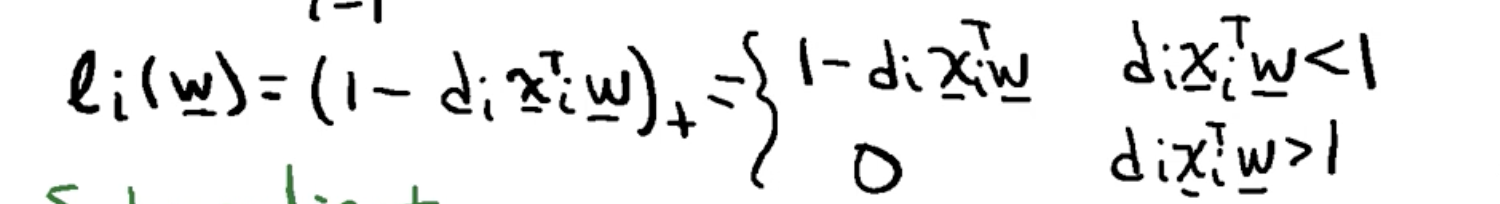

where $ d^i  = y^i $


In [282]:
class SVM:
    def __init__(self, lr = 1e-4, random_state=1, lambda_param = 1e-4, epochs = 10000):
        self.lr = lr
        self.random_state = random_state
        self.lambda_param = lambda_param
        self.rgen_ = np.random.RandomState(self.random_state)
        self.epochs = epochs
        self.training_acc_ =  []

    def fit(self, X,y):
        self.w_ = self.rgen_.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        self.losses_ = []
        for epoch in range(self.epochs):
            loss = []
            for x, y_ in zip(X,y):
                err = np.dot(self.net_input(x), y_)
                dw = 0
                db = 0
                if(err>1):
                    dw = 2 * self.lambda_param * self.w_
                    db =  0
                else:
                    dw = 2 * self.lambda_param * self.w_  - x.dot(y_)
                    db = -y_.mean()
                self.w_ -= self.lr *dw
                self.b_ -= self.lr * db
                loss.append(self.loss(x,y_))
            if epoch % 100 == 0 :
                self.losses_.append(np.mean(loss))
                self.training_acc_.append(self.calculate_accuracy(X, y))

    def loss(self, X, y):
        """
        We will be calculating hinge loss here
        """
        specification_term = 1 - np.dot(self.net_input(X), y)
        regularization_term = self.lambda_param * (np.linalg.norm(self.w_))**2
        return np.mean(np.maximum(specification_term,0)) + regularization_term
            

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        
        return  np.where(X<1, 1 - X,0)
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0, 1, -1)
    
    def calculate_accuracy(self, X,y):
        correct = self.predict(X)==y
        acc = sum(correct)/len(y) * 100
        return acc

    

In [283]:
#predictions with newer data
df = pd.read_csv("../../../../../Downloads/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [284]:
df = pd.DataFrame(df.values)
df


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [285]:
df = df.values
X = df[:, :-1]
y = df[:, -1]
y = 2*y-1

In [286]:
svm = SVM()
svm.fit(X,y)

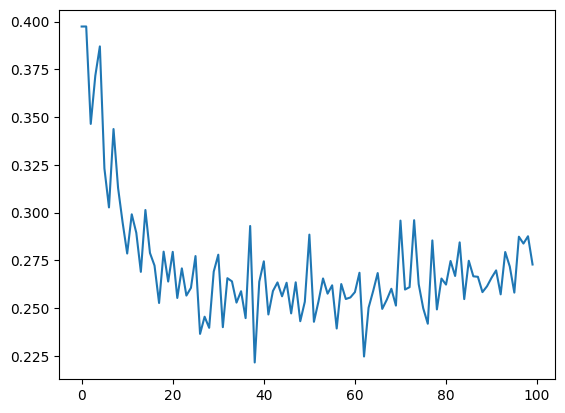

In [287]:
plt.plot(svm.losses_)

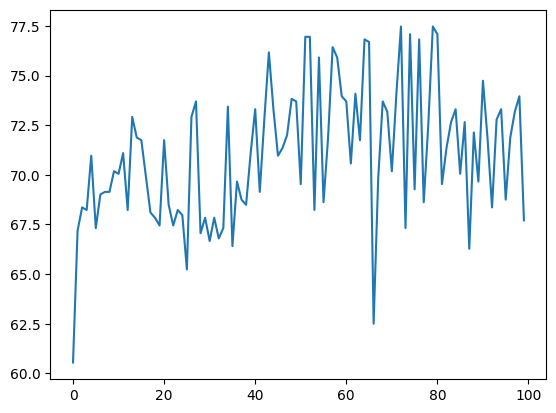

In [288]:
plt.plot(svm.training_acc_)

In [260]:
## another way of implementing the svm
class SVMClassifier:
    def __init__(self, lr = 1e-4, lambda_param = 1e-4, max_iter = 10000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.w = None
        self.b = None
        self.train_loss = []
        self.train_accuracy = []
    def hinge_loss(self, X,y):
        """
        We will be calculating hinge loss here
        """
        specification_term = 1 - y* (np.dot(X, self.w)+ self.b)
        regularization_term = self.lambda_param * np.linalg.norm(self.w)**2
        return np.mean(np.maximum(specification_term,0)) + regularization_term
    def derivate_hinge_loss(self, err, xi,yi):
        if err>1:
            dw = 2*self.lambda_param*self.w
            db = 0
        else:
            dw = 2*self.lambda_param*self.w - yi*xi
            db = -yi
        return dw, db
    def fit(self, X, y):
        self.w = np.ones(X.shape[1])
        self.b = 1

        for j in range(self.max_iter):
            for i, xi in enumerate(X):
                err = y[i]* (np.dot(X[i], self.w) + self.b)
                dw, db = self.derivate_hinge_loss(err, xi, y[i])
                self.w -= self.lr * dw
                self.b -= self.b * db

            if j% 100 == 0:
                self.train_loss.append(self.hinge_loss(X,y))
                self.train_accuracy.append(self.calculate_accuracy(X,y))
    def predict(self, X):
        return np.sign(np.dot(X, self.w)+ self.b)
    def calculate_accuracy(self, X,y):
        correct = self.predict(X)==y
        acc = sum(correct)/len(y) * 100
        return acc



In [289]:
#predictions with newer data get this from kaggle https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv("../../../../../Downloads/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [290]:
df = pd.DataFrame(df.values)
df = df.values
X = df[:, :-1]
y = df[:, -1]
y = 2*y-1

In [291]:
svm = SVMClassifier()
svm.fit(X,y)

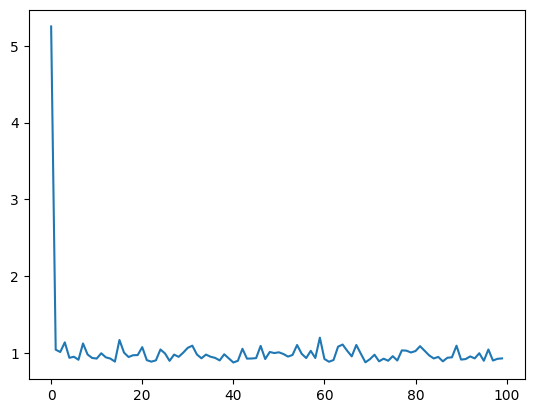

In [292]:
plt.plot(svm.train_loss)

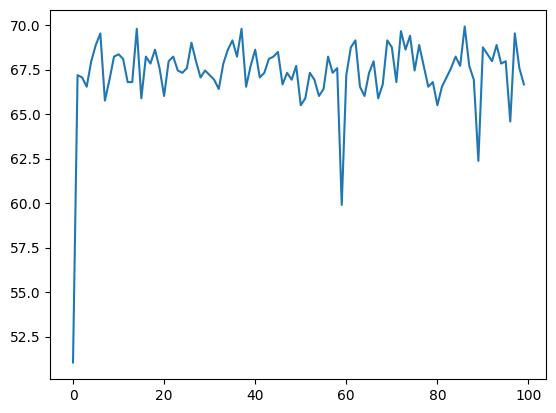

In [293]:
plt.plot(svm.train_accuracy)

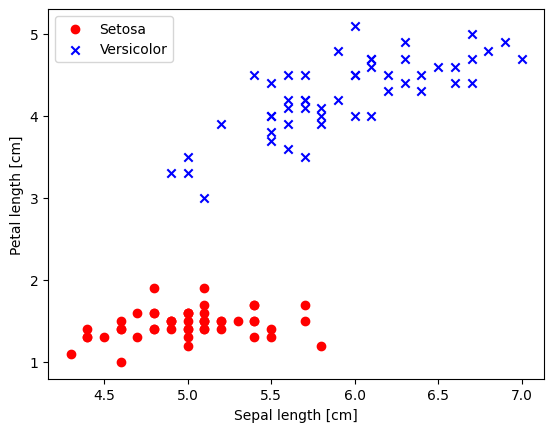

In [294]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", -1, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [295]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

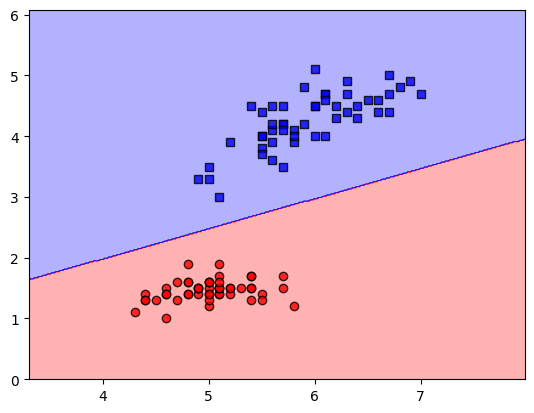

In [299]:
lg = SVMClassifier()
lg.fit(X,y)
plot_decision_regions(X, y, classifier=lg)


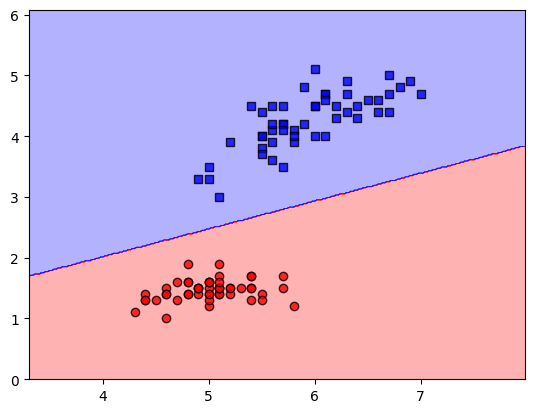

In [298]:
lg1 = SVM()
lg1.fit(X,y)
plot_decision_regions(X, y, classifier=lg1)
